In [1]:
import tensorflow as tf
# import tensorflow.python.keras as keras
import keras
# from tensorflow.python.keras.layers import InputLayer, Dense, Reshape, ReLU, Conv2D, Conv2DTranspose
# from keras.src.layers import BatchNormalization, InputLayer, Dense, Reshape, ReLU, Conv2D, Conv2DTranspose, LeakyReLU, \
#     Flatten, Dropout
# from keras.src.optimizers import Adam
# from keras.src.losses import BinaryCrossentropy
from keras.layers import BatchNormalization, InputLayer, Dense, Reshape, ReLU, Conv2D, Conv2DTranspose, LeakyReLU, \
    Flatten, Dropout
from keras.optimizer_v2.adam import Adam
from keras.losses import BinaryCrossentropy
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar100
# my project
from module.conf import PROJECT_DIR
# matplotlib.use("QTAgg")
%matplotlib inline

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(tf.config.list_physical_devices('GPU')[0], 'GPU')

In [4]:
# dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(60000).batch(128)
(x_train, _), (_, _) = cifar100.load_data()
x_train = (x_train.astype("float32") - 127.5) / 127.5  # Standartize to [-1, 1]

In [5]:
BATCH_SIZE = 32
# x_tmp = tf.convert_to_tensor(x_train, np.float64)
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(x_train.shape[0]).batch(BATCH_SIZE)
# dataset = tf.data.Dataset.from_tensors(x_train).shuffle(x_train.shape[0]).batch(BATCH_SIZE)
# dataset = x_train

In [6]:
class Generator(keras.Model):
    def __init__(self, noise_dim: int, target_shape: tuple):
        super(Generator, self).__init__()
        # self.model = keras.Sequential(layers= [
        #     InputLayer(input_shape=(noise_dim,)),
        #
        #     Dense(units=8*8*256, activation=None, use_bias=False),
        #     Reshape(target_shape=(4, 4, 1024)),
        #     BatchNormalization(),
        #     ReLU(),
        #
        #     Conv2DTranspose(128, (4, 4), strides=2, padding="same", use_bias=False),
        #     BatchNormalization(),
        #     ReLU(),
        #
        #     Conv2DTranspose(64, (4, 4), strides=2, padding="same", use_bias=False),
        #     BatchNormalization(),
        #     Conv2DTranspose(3, (4, 4), strides=2, padding="same", activation="tanh")
        # ])
        self.model = keras.Sequential(layers=[
            InputLayer(input_shape=(noise_dim,)),

            Dense(units=8 * 8 * 256, activation=None, use_bias=False),
            BatchNormalization(),
            LeakyReLU(),
            Reshape(target_shape=(8, 8, 256)),

            Conv2DTranspose(128, (5, 5), strides=(2,2), padding="same", use_bias=False),
            BatchNormalization(),
            LeakyReLU(),

            Conv2DTranspose(64, (5, 5), strides=(2,2), padding="same", use_bias=False),
            BatchNormalization(),
            LeakyReLU(),
            Conv2DTranspose(3, (5, 5), strides=(1,1), padding="same", activation="tanh")
        ], name="generator")
        # self.fc = Dense(units=8*8*256, use_bias=False)
        # self.bn1 = BatchNormalization()
        # self.relu = ReLU()
        #
        # self.conv1 = Conv2DTranspose(128, (4, 4), strides=2, padding="same", use_bias=False)
        # self.bn2 = BatchNormalization()
        # self.conv2 = Conv2DTranspose(64, (4, 4), strides=2, padding="same", use_bias=False)
        # self.bn3 = BatchNormalization()
        # self.conv3 = Conv2DTranspose(3, (4, 4), strides=2, padding="same", activation="tanh")
        pass

    def call(self, inputs, training=False):
        # x = self.fc(inputs, training=training)
        # x = tf.reshape(x, (-1, 4, 4, 1024))
        # x = self.bn1(x, training=training)
        # x = self.relu(x, training=training)
        #
        # x = self.conv1(x, training=training)
        # x = self.bn2(x, training=training)
        # x = self.relu(x, training=training)
        #
        # x = self.conv2(x, training=training)
        # x = self.bn3(x, training=training)
        # x = self.relu(x, training=training)
        #
        # x = self.conv3(x, training=training)  # Output shape: (32, 32, 3)
        # return x
        return self.model(inputs, training=training)

    def summary(self):
        return self.model.summary()

In [7]:
class Discriminator(keras.Model):
    def __init__(self, target_shape):
        super(Discriminator, self).__init__()
        # self.conv1 = Conv2D(64, (4, 4), strides=2, padding="same")
        # self.leaky_relu = LeakyReLU(0.2)
        # self.conv2 = Conv2D(128, (4, 4), strides=2, padding="same")
        # self.bn = BatchNormalization()
        # self.conv3 = Conv2D(filters=256, kernel_size=(4, 4), strides=2, padding="same")
        # self.flatten = Flatten()
        # self.fc = Dense(units=1, activation="sigmoid")
        # self.model = keras.Sequential(layers=[
        #     # InputLayer(shape=target_shape),
        #     # Flatten(input_shape=target_shape),
        #     Conv2D(filters=64, kernel_size=(4, 4), strides=2, padding="same"),
        #     LeakyReLU(0.2),
        #     Conv2D(filters=128, kernel_size=(4, 4), strides=2, padding="same"),
        #     BatchNormalization(),
        #     LeakyReLU(0.2),
        #     Conv2D(filters=256, kernel_size=(4, 4), strides=2, padding="same"),
        #     LeakyReLU(0.2),
        #     Flatten(),
        #     Dense(1, activation="sigmoid")
        # ])
        self.model = keras.Sequential(layers=[
            # InputLayer(shape=target_shape),
            # Flatten(input_shape=target_shape),
            Conv2D(filters=64, kernel_size=(5, 5), strides=2, padding="same", input_shape=target_shape),
            LeakyReLU(0.2),
            Dropout(0.3),

            Conv2D(filters=128, kernel_size=(5, 5), strides=2, padding="same"),
            # BatchNormalization(),
            LeakyReLU(0.2),
            Dropout(0.3),

            # Conv2D(filters=256, kernel_size=(4, 4), strides=2, padding="same"),
            # LeakyReLU(0.2),
            Flatten(),
            Dense(1, activation="sigmoid")
        ], name="discriminator")

    def call(self, inputs, training=False):
        # x = self.conv1(inputs, training=training)
        # x = self.leaky_relu(x, training=training)
        #
        # x = self.conv2(x, training=training)
        # x = self.bn(x, training=training)
        # x = self.leaky_relu(x, training=training)
        #
        # x = self.conv3(x, training=training)
        # x = self.leaky_relu(x, training=training)
        #
        # x = self.flatten(x, training=training)
        # x = self.fc(x, training=training)
        # return x
        return self.model(inputs, training=training)

    def summary(self):
        return self.model.summary()

In [8]:
class GAN(keras.Model):
    def __init__(self, noise_dim=100, target_shape=[32, 32, 3]):
        super(GAN, self).__init__()
        self.gen_optimizer = None
        self.disc_optimizer = None
        self.loss_fn = None
        self.noise_dim = noise_dim
        self.target_shape = target_shape
        self.generator = Generator(self.noise_dim, self.target_shape)
        self.discriminator = Discriminator(self.target_shape)

        # self.generator = self.generator.model
        # self.discriminator = self.discriminator.model
        return

    def compile(self, gen_optimizer, disc_optimizer, loss_fn):
        super(GAN, self).compile()
        self.gen_optimizer = gen_optimizer
        self.disc_optimizer = disc_optimizer
        self.loss_fn = loss_fn
        self.generator.compile()
        self.discriminator.compile()
        self.generator.summary()
        self.discriminator.summary()
        return

    @tf.function
    def train_step(self, batch):
        batch_sizes = tf.shape(batch)[0]
        # random noise
        noise = tf.random.normal(shape=(batch_sizes, self.noise_dim))

        # 1 - real image, 0 - fake image
        real_labels = tf.ones((batch_sizes, 1))
        fake_labels = tf.zeros((batch_sizes, 1))

        # train Discriminator
        with tf.GradientTape() as disc_tape:
            # gen fake img by Generator
            fake_images = self.generator(noise, training=True)

            real_preds = self.discriminator(batch, training=True)
            fake_preds = self.discriminator(fake_images, training=True)

            real_loss = self.loss_fn(real_labels, real_preds)
            fake_loss = self.loss_fn(fake_labels, fake_preds)
            disc_loss = tf.divide(tf.add(real_loss, fake_loss), 2)
            pass
        disc_grad = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)
        self.disc_optimizer.apply_gradients(zip(disc_grad, self.discriminator.trainable_variables))

        # train Generator
        with tf.GradientTape() as gen_tape:
            fake_images = self.generator(noise, training=True)
            fake_preds = self.discriminator(fake_images, training=True)
            gen_loss = self.loss_fn(real_labels, fake_preds)
            pass

        gen_grad = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        self.gen_optimizer.apply_gradients(zip(gen_grad, self.generator.trainable_variables))

        # return {"gen_loss": gen_loss, "disc_loss": disc_loss}
        return gen_loss, disc_loss

In [9]:
LATENT_DIM = 128
gan = GAN(noise_dim=LATENT_DIM)
gan.compile(
    # gen_optimizer=keras.optimizers.Adam(0.0002, 0.5),
    # disc_optimizer=keras.optimizers.Adam(0.0002, 0.5),
    # loss_fn=keras.losses.BinaryCrossentropy()
    # gen_optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9),
    # disc_optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9),
    # loss_fn=keras.losses.BinaryCrossentropy()
    # gen_optimizer=keras.optimizer_v2.adam.Adam(learning_rate=0.0002, beta_1=0.9),
    # disc_optimizer=keras.optimizer_v2.adam.Adam(learning_rate=0.0002, beta_1=0.9),
    # loss_fn=keras.losses.BinaryCrossentropy()

    gen_optimizer=Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999),
    disc_optimizer=Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999),
    loss_fn=BinaryCrossentropy()
)

# gan.fit(dataset, epochs=10000)
# gan.fit(dataset, epochs=1, batch_size=256)

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             2097152   
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16384)             0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 128)       819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 128)       0 

In [10]:
EPOCHS = 50
SAVE_DIR = f"{PROJECT_DIR}/data/models/cifar100_gan_{EPOCHS}"

def generate_and_save_images(epoch):
    noise = tf.random.normal([16, LATENT_DIM])
    generated_images = gan.generator(noise, training=False)
    generated_images = (generated_images + 1) / 2  # Transform to (0,1)
    r, c = 2, 8
    fig, axs = plt.subplots(r, c, figsize=(12, 3))
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(generated_images[i*c + j])
            axs[i, j].axis("off")
    plt.savefig(f"{SAVE_DIR}/epoch/out_{epoch}.png")
    plt.show()

Epoch 0: G Loss: 0.7195, D Loss: 0.6941


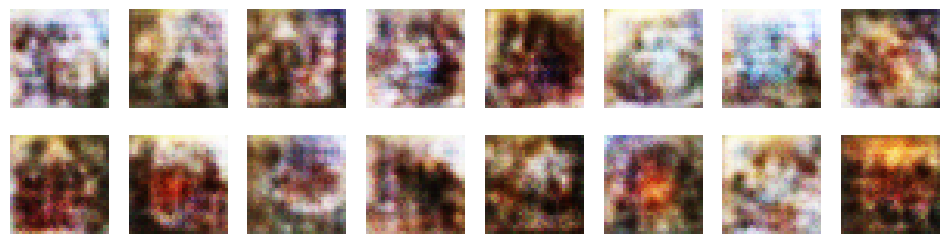

Epoch 10: G Loss: 0.8920, D Loss: 0.7049


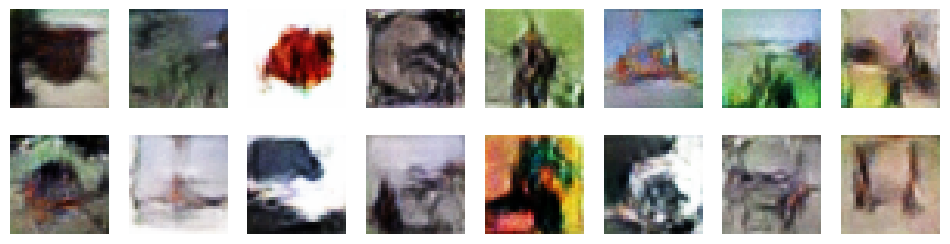

Epoch 20: G Loss: 0.8872, D Loss: 0.6195


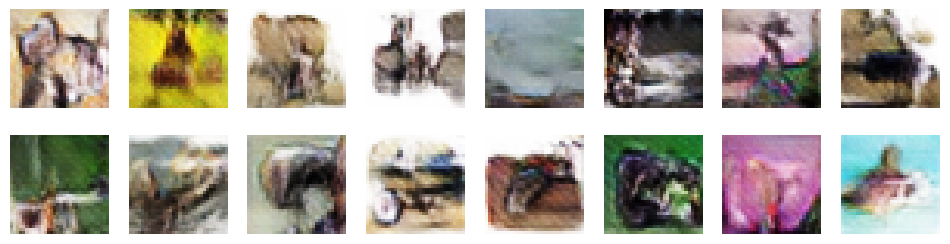

Epoch 30: G Loss: 0.8350, D Loss: 0.6701


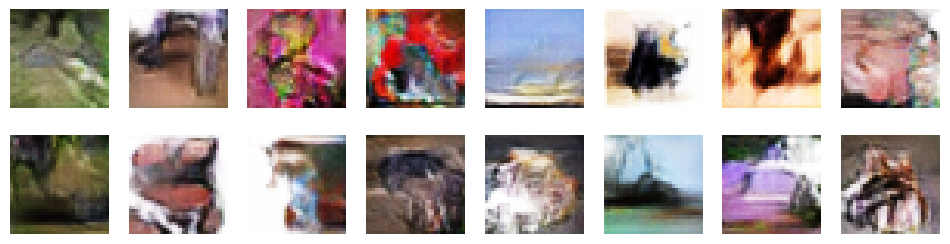

Epoch 40: G Loss: 0.8611, D Loss: 0.6305


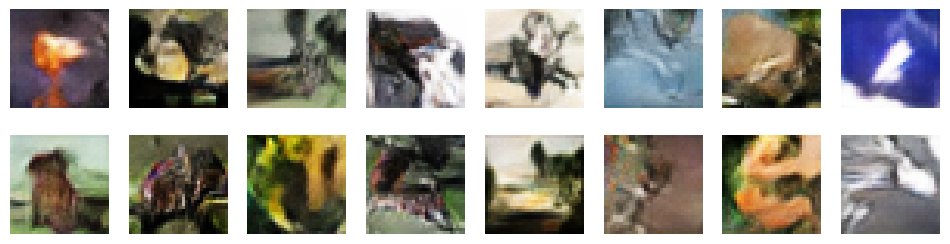

In [11]:
for epoch in range(EPOCHS):
    for real_images in dataset:
        gen_loss, disc_loss = gan.train_step(real_images)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: G Loss: {gen_loss.numpy():.4f}, D Loss: {disc_loss.numpy():.4f}")
        generate_and_save_images(epoch)

In [12]:
gan.save_weights(f"{SAVE_DIR}/model")

In [ ]:
# gan.load_weights(f"{SAVE_DIR}/model")

In [ ]:
import matplotlib.pyplot as plt

def generate_and_show_images(generator, num_examples=10):
    noise = tf.random.normal(shape=(num_examples, LATENT_DIM))
    images = generator(noise, training=False)
    images = (images + 1) / 2.0  # standardize to [0, 1]
    r, c  = 2, 8

    fig, axes = plt.subplots(nrows=r, ncols=c, figsize=(12, 3))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap="gray")
        ax.axis("off")
    plt.show()


generate_and_show_images(gan.generator, num_examples=20)